In [1]:
import numpy as np

In [7]:
!pip install tensorflow opencv-python matplotlib

In [9]:
!pip list

Package                           Version            Editable project location
--------------------------------- ------------------ -------------------------------------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anacon

In [11]:
import tensorflow as tf
import os

In [23]:
data_dir = 'data/LungCancerDataset'

In [29]:
os.listdir(data_dir)

['Bengin cases',
 'IQ-OTH_NCCD lung cancer dataset.txt',
 'Malignant cases',
 'Normal cases']

# Load Data

In [38]:
import numpy as np
from matplotlib import pyplot as plt

In [40]:
data = tf.keras.utils.image_dataset_from_directory('data/LungCancerDataset')

Found 1097 files belonging to 3 classes.


In [46]:
data_iterator = data.as_numpy_iterator()

In [48]:
batch = data_iterator.next()

In [54]:
batch[0].shape

(32, 256, 256, 3)

In [56]:
batch[1]

array([2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 1, 2, 2, 1, 1,
       0, 1, 1, 1, 2, 2, 2, 1, 1, 1])

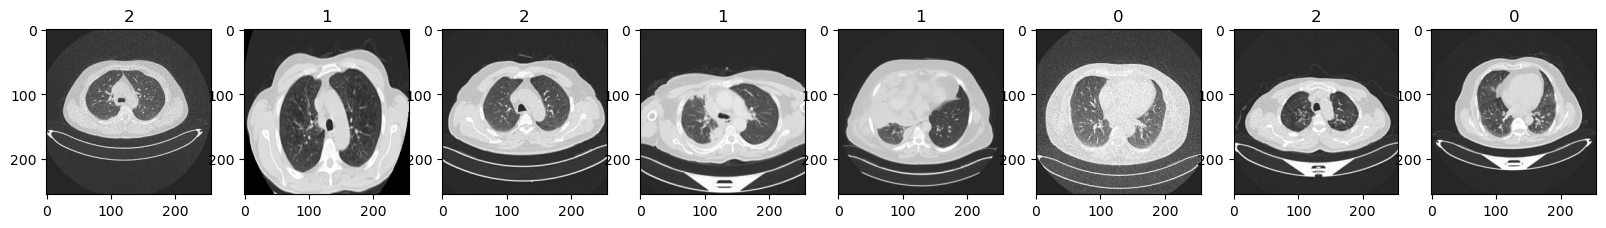

In [79]:
fig,ax =  plt.subplots(ncols=8,figsize=(20,20))
for idx , img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) 

# Note:
* 0 ->bengin class
* 1 ->Malignant class
* 2 -> normal class

# Lets preprocess our data


# 1. Scaling our data


In [83]:
scaled = data.map(lambda x,y:(x/255,y))

In [87]:
scaled_iterator = data.as_numpy_iterator()

In [89]:
batch = scaled_iterator.next()

In [94]:
batch[0].max()

1.0

# 2. Split data


In [98]:
len(data)

35

In [108]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1


In [110]:
train_size

24

In [112]:
val_size

7

In [114]:
test_size

4

In [116]:
 train_size+val_size+test_size

35

In [118]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [122]:
len(train)

24

# Lets Build Deep Learning Model for Lung Cancer Detection Systm

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

In [127]:
model = Sequential()

In [129]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))#for prediction of 3 classes

C:\Users\kande\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [146]:
model.compile('adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [148]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Training deep learning model

In [151]:
logdir = 'logs'

In [153]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [155]:
hist = model.fit(train,epochs=20,validation_data = val,callbacks =[tensorboard_callback])

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 256ms/step - accuracy: 0.4673 - loss: 1.5120 - val_accuracy: 0.6875 - val_loss: 0.6760
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.7309 - loss: 0.6295 - val_accuracy: 0.8571 - val_loss: 0.3111
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.8921 - loss: 0.2866 - val_accuracy: 0.9688 - val_loss: 0.0943
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - accuracy: 0.9818 - loss: 0.0703 - val_accuracy: 0.9866 - val_loss: 0.0520
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.9881 - loss: 0.0451 - val_accuracy: 0.9732 - val_loss: 0.0509
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.9975 - loss: 0.0211 - val_accuracy: 0.9955 - val_loss: 0.0188
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.9937 - loss: 0.0396 - val_accuracy: 0.9911 - val_loss: 0.0175
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.9899 - loss: 0.0231 - val_accuracy: 0.

# Perfomance Plotting 

In [160]:
hist.history

{'accuracy': [0.54296875,
  0.7721354365348816,
  0.92578125,
  0.9778645634651184,
  0.98828125,
  0.9947916865348816,
  0.9973958134651184,
  0.9947916865348816,
  0.9934895634651184,
  0.9895833134651184,
  0.9947916865348816,
  0.9973958134651184,
  0.9947916865348816,
  0.99609375,
  0.9934895634651184,
  0.9973958134651184,
  0.9947916865348816,
  0.9973958134651184,
  0.9973958134651184,
  0.9934895634651184],
 'loss': [1.1154457330703735,
  0.5454276204109192,
  0.22393137216567993,
  0.07514456659555435,
  0.04261166974902153,
  0.023880140855908394,
  0.016018712893128395,
  0.02085290290415287,
  0.025749916210770607,
  0.03440696746110916,
  0.01790700852870941,
  0.013593313284218311,
  0.01867377944290638,
  0.008138221688568592,
  0.016189591959118843,
  0.008030903525650501,
  0.011544402688741684,
  0.006971895694732666,
  0.01172453910112381,
  0.017696723341941833],
 'val_accuracy': [0.6875,
  0.8571428656578064,
  0.96875,
  0.9866071343421936,
  0.9732142686843872,

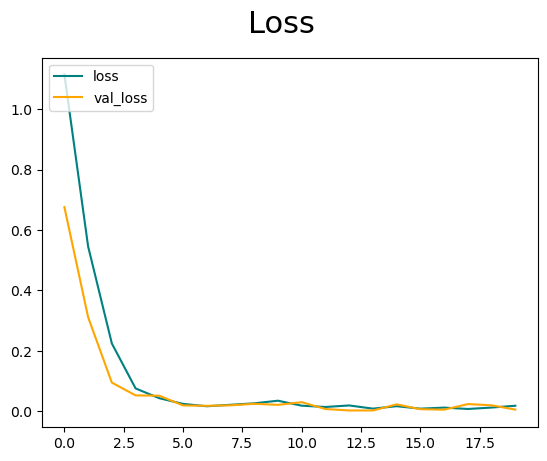

In [162]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=22)
plt.legend(loc="upper left")
plt.show()

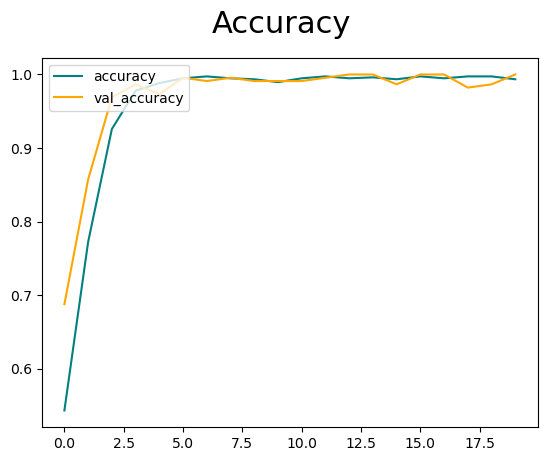

In [164]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=22)
plt.legend(loc="upper left")
plt.show()

In [168]:
from tensorflow.keras.metrics import Precision, Recall , CategoricalAccuracy

In [170]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [172]:
len(test)

4

In [178]:
for batch in test.as_numpy_iterator():
    x, y = batch
    
    # Get predictions (convert softmax probabilities to class labels)
    yhat = model.predict(x)
    yhat = tf.argmax(yhat, axis=1)  # Convert to class indices (0,1,2)
    
    # Update metrics
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


In [180]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# Saving the model


In [183]:
from tensorflow.keras.models import load_model

In [185]:
model.save(os.path.join('model','LungCancerDetectionModel.h5'))